<h1 style="text-align: center; color: #0072B2;">EDA Incidence of Liver Disease in different sub-population</h1>

## Introduction

In this analysis, I explored the dataset available on Kaggle, titled [Predict Liver Disease: 1700 Records Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset). The focus of this study is to investigate the incidence of liver diseases across various subgroups of the population provided by the dataset. By examining the data, we aim to identify trends and insights that could contribute to a better understanding of liver disease prevalence and its impact on different demographics, especially the impact of physical activity and smoking factor.


## Data Analysis and Visualization

In this analysis, I employed Python for data manipulation to extract populations of interest and compute the incidence of liver disease.


## Criteria for Extracting the Population of Interest

The selection of the population of interest was guided by specific health-related criteria aimed at identifying relevant subgroups for analysis. The following parameters were utilized:

- **Age**: Individuals aged between 20 and 50 years old.
- **BMI**: All categories of Body Mass Index were included to ensure a comprehensive analysis (Range: 15 to 40).
- **Alcohol Consumption**: A minimum consumption level of 8 on a scale from 0 to 20 was set as a threshold (Range: 0 to 20 units per week.).
- **Smoking Status**: This variable distinguishes between non-smokers (0) and smokers (1).
- **Physical Activity**: Participants were categorized based on their weekly physical activity levels, ranging from 0 to 10 hours.
- **Diabetes**: No (0) or Yes (1). Only individuals without diabetes (0) were included.
- **Hypertension**: No (0) or Yes (1). The analysis focused on those without hypertension (0).
- **Genetic Risks**: Participants were classified based on their genetic risk levels, categorized as Low (0), Medium (1) or High (2).
- **Gender**: Individuals were classified as Male (0) or Female (1).
- **Liver Function Test**: Range 20 to 100.
- **Diagnosis**: Binary indicator (0 or 1) of liver disease presence.

These criteria were carefully chosen to isolate populations most relevant to the study of liver disease incidence.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def sport_population(df, smoking, sport, gender):
    '''
    FUNCTION TO EXTRACT A SUB-POPULATION (High-Active population)
    smoking can be either 0 (non smokers) or 1 (smokers)
    sport, or physical activity of the individual, can range from 0 to 10 (hours per week).
    '''
    new_data = df[
        (df['Age'] >= 20) & (df['Age'] <= 50) &
        (df['AlcoholConsumption'] >= 8) &
        (df['Smoking'] == smoking) &
        (df['PhysicalActivity'] > sport) & 
        (df['Diabetes'] == 0) &
        (df['Hypertension'] == 0) &
        (df['Gender'] == gender)
    ]
    return new_data


def couch_population(df, smoking, sport, gender):
    '''
    FUNCTION TO EXTRACT A SUB-POPULATION (Low-Active population)
    smoking can be either 0 (non smokers) or 1 (smokers)
    sport, physical activity of the individual, can range from 0 to 10 (hours per week).
    '''
    new_data = df[
        (df['Age'] >= 20) & (df['Age'] <= 50) &
        (df['AlcoholConsumption'] >= 8) &
        (df['Smoking'] == smoking) &
        (df['PhysicalActivity'] <= sport) & 
        (df['Diabetes'] == 0) &
        (df['Hypertension'] == 0) &
        (df['Gender'] == gender)
    ]
    return new_data


def incidence(df):
    '''
    FUNCTION TO CALCULATE THE INCIDENCE ON A SUB-POPULATION
    '''
    total_population = len(df)
    sick_population = df['Diagnosis'].sum()
    incidence_rate = (sick_population / total_population) * 100
    return incidence_rate


In [5]:
# load the data, the general population is represented by 'data'
data = pd.read_csv('Liver_disease_data.csv')
incidence_data = incidence(data)
print(f"Incidence in the general population: {incidence_data:.2f}%")

Incidence in the general population: 55.06%


In [6]:
# LOW ACTIVE (df['PhysicalActivity'] <= 5) NON SMOKERS (0) (MALE) (0)
m_lowactive_nonsmokers = couch_population(data, 0, 5, 0)
m_incidence_lowactnonsmokers = incidence(m_lowactive_nonsmokers)
print(f"Incidence in the low-active non-smoking male population: {m_incidence_lowactnonsmokers:.2f}%")

Incidence in the low-active non-smoking male population: 42.62%


In [7]:
# LOW ACTIVE (df['PhysicalActivity'] <= 5) NON SMOKERS (0) (FEMALE) (1)
f_lowactive_nonsmokers = couch_population(data, 0, 5, 1)
f_incidence_lowactnonsmokers = incidence(f_lowactive_nonsmokers)
print(f"Incidence in the low-active non-smoking female population: {f_incidence_lowactnonsmokers:.2f}%")

Incidence in the low-active non-smoking female population: 67.80%


In [8]:
# LOW ACTIVE (df['PhysicalActivity'] <= 5) SMOKERS (1) (MALE) (0)
m_lowactive_smokers = couch_population(data, 1, 5, 0)
m_incidence_lowactSmk = incidence(m_lowactive_smokers)
print(f"Incidence in the male low-active smoker population: {m_incidence_lowactSmk:.2f}%")

Incidence in the male low-active smoker population: 75.86%


In [15]:
# LOW ACTIVE (df['PhysicalActivity'] <= 5) SMOKERS (1) (FEMALE) (1)
f_lowactive_smokers = couch_population(data, 1, 5, 1)
f_incidence_lowactSmk = incidence(f_lowactive_smokers)
print(f"Incidence in the female low-active smoker population: {f_incidence_lowactSmk:.2f}%")

Incidence in the female low-active smoker population: 68.97%


In [17]:
# HIGH ACTIVE (df['PhysicalActivity'] > 5) NON SMOKERS (0) (MALE) (0)
m_highactive_nonSmokers = sport_population(data, 0, 5, 0)
m_incidence_highactivenonSmokers = incidence(m_highactive_nonSmokers)
print(f"Incidence in the male high-active non-smoker population: {m_incidence_highactivenonSmokers:.2f}%")

Incidence in the male high-active non-smoker population: 30.51%


In [19]:
# HIGH ACTIVE (df['PhysicalActivity'] > 5) NON SMOKERS (0) (FEMALE) (1)
f_highactive_nonSmokers = sport_population(data, 0, 5, 1)
f_incidence_highactivenonSmokers = incidence(f_highactive_nonSmokers)
print(f"Incidence in the female high-active non-smoker population: {f_incidence_highactivenonSmokers:.2f}%")

Incidence in the female high-active non-smoker population: 44.78%


In [21]:
# HIGH ACTIVITY (df['PhysicalActivity'] > 5) SMOKERS (1) (MALE) (0)
m_highactive_smokers = sport_population(data, 1, 5, 0)
m_incidence_smokesport = incidence(m_highactive_smokers)
print(f"Incidence in the male high-active smoker population: {m_incidence_smokesport:.2f}%")

Incidence in the male high-active smoker population: 62.07%


In [23]:
# HIGH ACTIVITY (df['PhysicalActivity'] > 5) SMOKERS (1) (FEMALE) (1)
f_highactive_smokers = sport_population(data, 1, 5, 1)
f_incidence_smokesport = incidence(f_highactive_smokers)
print(f"Incidence in the female high-active smoker population: {f_incidence_smokesport:.2f}%")

Incidence in the female high-active smoker population: 84.38%


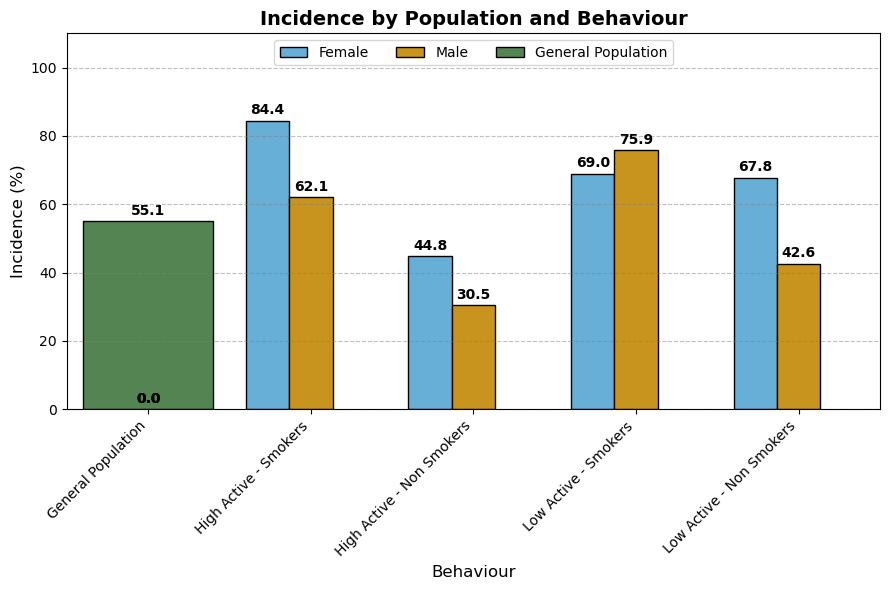

In [25]:
# Dati
raw_data = [
    ['General Population', 'General Population', incidence_data],
    ['Male', 'Low Active - Non Smokers', m_incidence_lowactnonsmokers],
    ['Male', 'Low Active - Smokers', m_incidence_lowactSmk],
    ['Male', 'High Active - Non Smokers', m_incidence_highactivenonSmokers],
    ['Male', 'High Active - Smokers', m_incidence_smokesport],
    ['Female', 'Low Active - Non Smokers', f_incidence_lowactnonsmokers],
    ['Female', 'Low Active - Smokers', f_incidence_lowactSmk],
    ['Female', 'High Active - Non Smokers', f_incidence_highactivenonSmokers],
    ['Female', 'High Active - Smokers', f_incidence_smokesport]
]

df = pd.DataFrame(raw_data, columns=['Population', 'Behaviour', 'Incidence'])
df['Incidence'] = pd.to_numeric(df['Incidence'])

behaviour_order = [
    'General Population',
    'High Active - Smokers', 'High Active - Non Smokers',
    'Low Active - Smokers', 'Low Active - Non Smokers'
]
population_order = ['Female', 'Male', 'General Population']

df_general = df[df['Behaviour'] == 'General Population']
df_others = df[df['Behaviour'] != 'General Population']


plt.figure(figsize=(9, 6))

# Barplot for the General Population
sns.barplot(
    data=df_general, x='Behaviour', y='Incidence', hue='Population',
    order=behaviour_order, hue_order=population_order,
    palette={'General Population': '#4C8C4A', 'Male': '#E69F00', 'Female': '#56B4E9'},
    edgecolor='black', dodge=False
)

# Barplot for the variables (except the General Population)
sns.barplot(
    data=df_others, x='Behaviour', y='Incidence', hue='Population',
    order=behaviour_order, hue_order=population_order,
    palette={'General Population': '#4C8C4A', 'Male': '#E69F00', 'Female': '#56B4E9'},
    edgecolor='black', dodge=True
)

for bar in plt.gca().patches:
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    plt.text(
        bar_x, bar_y + 1, f"{bar_y:.1f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Incidence by Population and Behaviour', fontsize=14, fontweight='bold')
plt.xlabel('Behaviour', fontsize=12)
plt.ylabel('Incidence (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 110)
plt.legend(title='', loc='upper center', ncol=3, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.show()

The graph reveals a general trend indicating a higher incidence of liver diseases among women compared to men (for further details, see the Gender Distribution plot in the accompanying .ipynb file within this repository). However, an exception to this trend is observed among low inactive smokers, where men show a higher incidence rate of 76%, compared to 69% among women. Notably, within both the male and female smoker categories, engaging in 6 to 10 hours of weekly physical activity results in a reduction in liver disease incidence by approximately 12-13% when compared to individuals who engage in 0 to 5 hours of physical activity per week. Additionally, the data clearly demonstrate that smoking is associated with an increased incidence of liver diseases.

One of the most striking findings from this analysis is the nearly 40% difference in liver disease incidence between physically active female smokers and non-smokers, a gap that exceeds the difference observed in males. Even more intriguing is the minimal difference in liver disease incidence between physically inactive female smokers and non-smokers. This highlights a unique aspect within this subgroup. In contrast, a significant difference—approximately 33%—is observed between low-active male smokers and their low-active male non-smoking counterparts.